In [79]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import respy as rp
import numpy as np

params_base, options, df = rp.get_example_model("robinson", with_data=True)

params_base["lower"] = [0.5, 4.0, -1, -1, 0.5, 0.5, -0.2]
params_base["upper"] = [1.0, 6.0, 1, 1, 1.5, 1.5, +0.2]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
params_base.head(50)

value  lower  upper
category       name                                     
delta          delta                   1.0    0.5    1.0
wage_fishing   exp_fishing             5.0    4.0    6.0
nonpec_fishing constant                0.0   -1.0    1.0
nonpec_hammock constant                0.0   -1.0    1.0
shocks_sdcorr  sd_fishing              1.0    0.5    1.5
               sd_hammock              1.0    0.5    1.5
               corr_hammock_fishing    0.0   -0.2    0.2

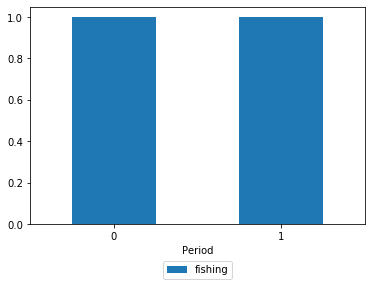

In [81]:
fig, ax = plt.subplots()

df.groupby("Period").Choice.value_counts(normalize=True).unstack().plot.bar(
    stacked=True, ax=ax
)


plt.xticks(rotation="horizontal")

plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.275), ncol=2)

plt.show()
plt.close()


In [83]:
crit_func = rp.get_crit_func(params_base, options, df)
crit_func(params_base)

-7.704241478944642

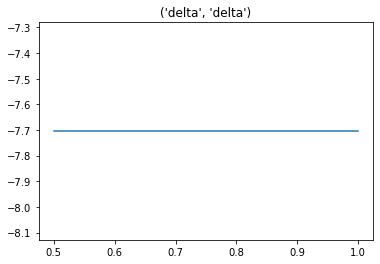

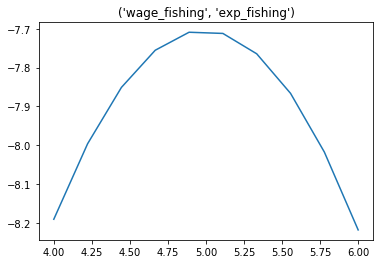

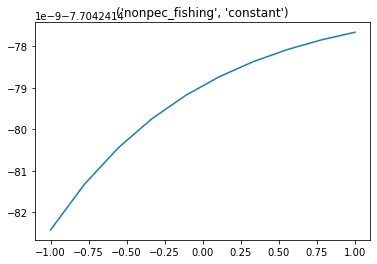

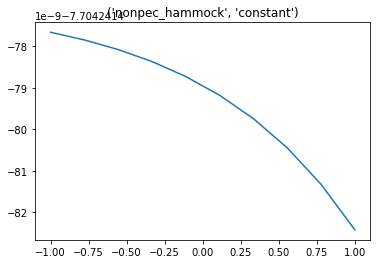

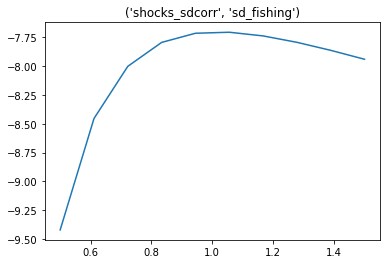

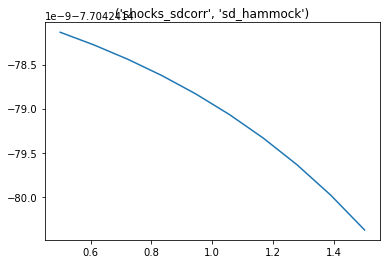

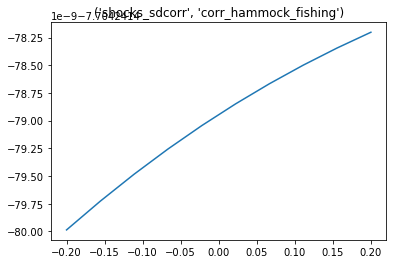

In [84]:
for index in params_base.index:
    upper, lower = params_base.loc[index][["upper", "lower"]]


    grid = np.linspace(lower, upper, 10)
    
    fvals = list()
    for value in grid:
        params = params_base.copy()
        params.loc[index, "value"] = value
        fvals.append(crit_func(params))
    
    fig, ax = plt.subplots()
        
    ax.plot(grid, fvals)
    ax.set_title(index)
    plt.show()